Questão 1

C:\Users\vinic\AppData\Local\Temp\ipykernel_21340\279107943.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_hd', y='latencia_ms', data=df, palette='Set1')


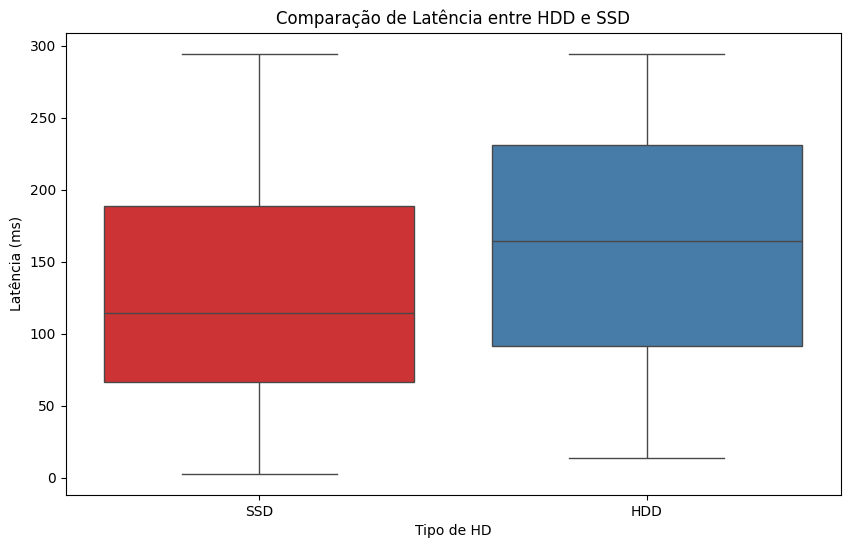

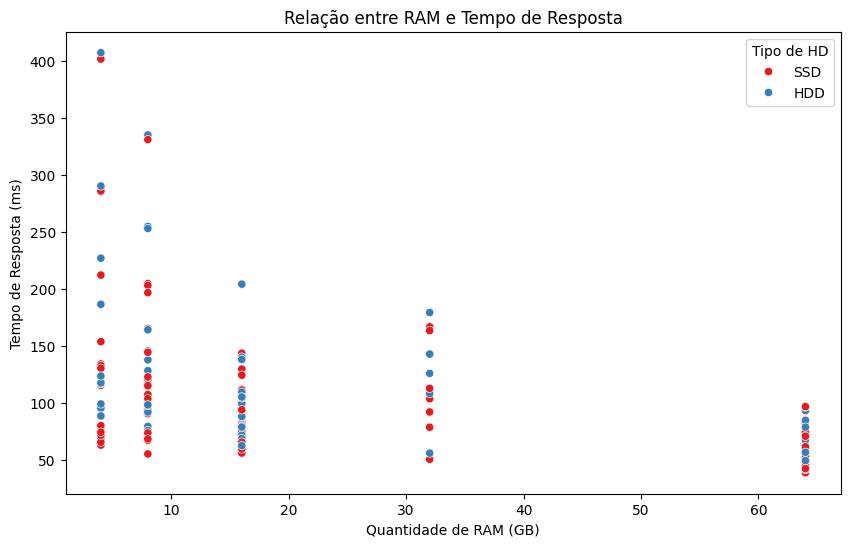

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy as psy
import statsmodels.api as sm


file_path = "./dataset_22.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

# Comparação de latência entre HDD e SSD
sns.boxplot(x='tipo_hd', y='latencia_ms', data=df, palette='Set1')

plt.title('Comparação de Latência entre HDD e SSD')
plt.xlabel('Tipo de HD')
plt.ylabel('Latência (ms)')
plt.show()

# Análise da relação entre quantidade de RAM e tempo de resposta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_gb', y='tempo_resposta', palette='Set1', data=df, hue='tipo_hd')
plt.title('Relação entre RAM e Tempo de Resposta')
plt.xlabel('Quantidade de RAM (GB)')
plt.ylabel('Tempo de Resposta (ms)')
plt.legend(title='Tipo de HD')
plt.show()

# Gráfico Boxplot - Latência entre HDD e SSD
Os SSDs apresentam latência menor e mais estável, com mediana visivelmente inferior à dos HDDs. Já os HDDs têm latência mais alta e variada, indicando desempenho inferior. Isso confirma que o tipo de armazenamento tem impacto direto na velocidade de resposta.

# Gráfico de Dispersão – RAM vs Tempo de Resposta
O tempo de resposta tende a ser ligeiramente menor em sistemas com SSD, o que indica uma certa vantagem desse tipo de armazenamento. No entanto, a variação dentro dos grupos ainda é alta, o que mostra que nem o SSD garante consistência, e que a quantidade de RAM sozinha também não explica as diferenças de desempenho. A influência de outros fatores, como processador e configuração geral do sistema, continua relevante.

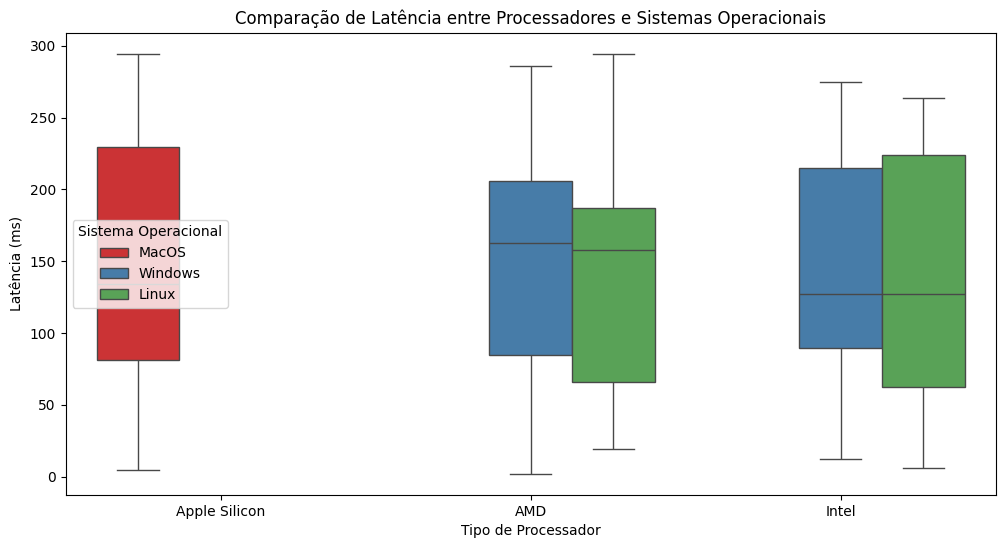

In [3]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='tipo_processador', y='latencia_ms', hue='sistema_operacional', data=df, palette='Set1')

plt.title('Comparação de Latência entre Processadores e Sistemas Operacionais')
plt.xlabel('Tipo de Processador')
plt.ylabel('Latência (ms)')
plt.legend(title='Sistema Operacional')
plt.show()

# Gráfico Boxplot – Latência vs SO e Processadores

ETAPA II  
2 -

In [4]:
df_clean = df.dropna(subset=[
    'tempo_resposta', 'cpu_cores', 'ram_gb', 'latencia_ms', 'armazenamento_tb',
    'sistema_operacional', 'tipo_hd', 'tipo_processador'
])

#FORMULA DO MODELO
formula = 'tempo_resposta ~ cpu_cores + ram_gb + latencia_ms + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'

y, X = psy.dmatrices(formula, data=df_clean, return_type='dataframe')

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     33.08
Date:                Fri, 02 May 2025   Prob (F-statistic):           6.94e-28
Time:                        19:04:22   Log-Likelihood:                -700.06
No. Observations:                 139   AIC:                             1418.
Df Residuals:                     130   BIC:                             1445.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


 3 -

Intercepto e Coeficientes:
- Intercepto: 239.9116
- C(sistema_operacional)[T.MacOS]	-0.6772
- C(sistema_operacional)[T.Windows]	13.0119
- C(tipo_hd)[T.SSD]	0.3598
- C(tipo_processador)[T.Apple Silicon]	-0.6772
- C(tipo_processador)[T.Intel]	-10.2334
- cpu_cores	-12.0201
- ram_gb	-1.1836
- latencia_ms	0.0025
- armazenamento_tb	-4.3444

Valor de R² e R² Ajustado:
- R²: 0.671
- R² Ajustado: 0.650

Valores de Testes:  
Teste F – Avaliação Global do Modelo
- F-statistic: 33,08
- p-valor do F: 6,94 × 10**-28

Testes t – Avaliação Individual dos Coeficientes  
Cada coeficiente foi testado individualmente com base na estatística t e seu p-valor (P>|t|). Abaixo, os principais resultados:
- cpu_cores	-13,56	< 0,001	Significativo: mais núcleos reduzem o tempo de resposta
- ram_gb	-8,26	< 0,001	Significativo: mais RAM reduz o tempo de resposta
- latencia_ms	0,06	0,951	Não significativo
- armazenamento_tb	-0,83	0,409	Não significativo
- tipo_hd = SSD	0,05	0,959	Não significativo
- sistema_operacional = Windows	1,59	0,115	Não significativo
- tipo_processador = Intel	-1,21	0,227	Não significativo

4 -

Quais foram as variáveis categóricas e como foram tratadas?  

As seguintes variáveis do dataset são categóricas:

- sistema_operacional (Linux, Windows, MacOS)

- tipo_hd (HDD, SSD)

- tipo_processador (AMD, Intel, Apple Silicon)

Essas variáveis foram tratadas com codificação dummy, utilizando C(...) na fórmula da regressão com statsmodels e patsy. Esse método cria colunas binárias para representar as categorias, permitindo seu uso no modelo de regressão linear.

Qual foi a categoria base de cada variável?  
Durante a codificação dummy, uma categoria é usada como referência (base) e é omitida do modelo para evitar multicolinearidade. Neste caso, as categorias base foram:

- sistema_operacional: Linux

- tipo_hd: HDD

- tipo_processador: AMD

Os coeficientes das categorias indicam a diferença no tempo de resposta em relação à categoria base:  

- sistema_operacional = Windows:
Coef. ≈ +13,01 → Windows teve, em média, 13 ms a mais que Linux. (Não significativo)

- sistema_operacional = MacOS:
Coef. ≈ -0,68 → Diferença irrelevante em relação ao Linux. (Não significativo)

- tipo_hd = SSD:
Coef. ≈ +0,36 → Desempenho praticamente igual ao HDD. (Não significativo)

- tipo_processador = Intel:
Coef. ≈ -10,23 → Tempo de resposta cerca de 10 ms menor que AMD. (Não significativo)

- tipo_processador = Apple Silicon:
Coef. ≈ -0,68 → Diferença irrelevante em relação ao AMD. (Não significativo)

5 -

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["variavel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                               variavel        VIF
0                             Intercept  17.623165
1       C(sistema_operacional)[T.MacOS]        inf
2     C(sistema_operacional)[T.Windows]   1.514890
3                     C(tipo_hd)[T.SSD]   1.119761
4  C(tipo_processador)[T.Apple Silicon]        inf
5          C(tipo_processador)[T.Intel]   1.279476
6                             cpu_cores   1.025985
7                                ram_gb   1.037738
8                           latencia_ms   1.050289
9                      armazenamento_tb   1.068076


c:\Users\vinic\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- A maioria das variáveis ficou com VIF menor que 2, o que mostra que não tem multicolinearidade relevante entre elas.
- Porém, os valores infinitos no VIF para C(sistema_operacional)[T.MacOS] e C(tipo_processador)[T.Apple Silicon] indicam que essas variáveis estão totalmente ligadas a alguma outra, ou até com elas mesmas, o que causa esse problema (Verifiquei na base e é isso mesmo).
- Mesmo assim, como o modelo ficou com um bom R² (0,67) e essas variáveis nem são significativas, não há necessidade de tirar elas por enquanto.

6 -

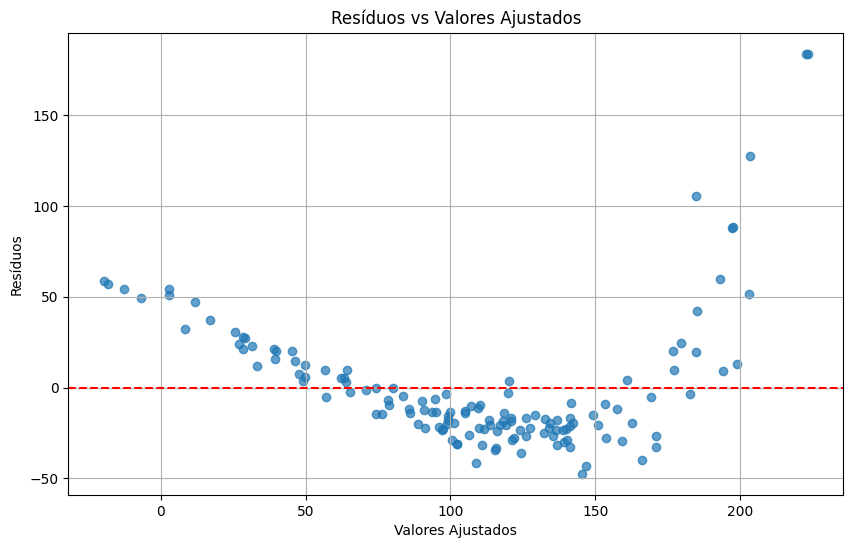

{'Lagrange Multiplier (LM)': np.float64(18.543396823788193), 'p-valor LM': np.float64(0.02936766932256552), 'F-statistic': np.float64(2.5015664599619543), 'p-valor F': np.float64(0.01466984687684563)}


In [6]:
from statsmodels.stats.diagnostic import het_breuschpagan

df_clean = df.dropna(subset=[
    'tempo_resposta', 'cpu_cores', 'ram_gb', 'latencia_ms', 'armazenamento_tb',
    'sistema_operacional', 'tipo_hd', 'tipo_processador'
])

# tratamento
formula = 'tempo_resposta ~ cpu_cores + ram_gb + latencia_ms + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'

# y e X como dummies
y, X = psy.dmatrices(formula, data=df_clean, return_type='dataframe')

# ajuste do modelo
modelo = sm.OLS(y, X).fit()

# obter as varíaveis 
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

# gráfico
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

# teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X)

# resultado do teste
labels = ['Lagrange Multiplier (LM)', 'p-valor LM', 'F-statistic', 'p-valor F']
resultado_bp = dict(zip(labels, bp_test))
print(resultado_bp)


Para verificar se havia heterocedasticidade no modelo, usei um gráfico de resíduos e também o teste de Breusch-Pagan.  
No gráfico de Resíduos vs Valores ajustados, a dispersão dos pontos não era uniforme, gerando uma hipótese de heterocedasticidade.


Aplicando o teste de Breusch-Pagan, os resultados confirmam a hipótese:  

- p-valor LM = 0.029
  
- p-valor F = 0.014

Como os dois p-valores ficaram abaixo de 0,05, dá pra concluir que existe heterocedasticidade significativa no modelo. Isso quer dizer que os resíduos não têm uma variância constante, podendo influenciar nos erros padrão e deixar os testes t menos confiáveis.

In [8]:
# Modelo 1 (completo)
formula1 = 'tempo_resposta ~ cpu_cores + ram_gb + latencia_ms + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'
y1, X1 = psy.dmatrices(formula1, data=df_clean, return_type='dataframe')
modelo1 = sm.OLS(y1, X1).fit()

# Modelo 2 (sem latencia_ms)
formula2 = 'tempo_resposta ~ cpu_cores + ram_gb + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'
y2, X2 = psy.dmatrices(formula2, data=df_clean, return_type='dataframe')
modelo2 = sm.OLS(y2, X2).fit()

# Comparação
comparacao = {
    "Modelo": ["Modelo 1 (completo)", "Modelo 2 (sem latencia_ms)"],
    "R²": [modelo1.rsquared, modelo2.rsquared],
    "R² Ajustado": [modelo1.rsquared_adj, modelo2.rsquared_adj],
    "Estatística F": [modelo1.fvalue, modelo2.fvalue],
    "p-valor F": [modelo1.f_pvalue, modelo2.f_pvalue]
}

df_comparacao = pd.DataFrame(comparacao)
print(df_comparacao)


                       Modelo        R²  R² Ajustado  Estatística F  \
0         Modelo 1 (completo)  0.670596     0.650325      33.081532   
1  Modelo 2 (sem latencia_ms)  0.670587     0.652984      38.096668   

      p-valor F  
0  6.941596e-28  
1  1.080985e-28  


Os dois modelos tiveram um desempenho bem parecido em relação ao R², ambos explicam praticamente a mesma parte da variação no tempo de resposta.

Mas o Modelo 2, que não usa a variável de "latencia_ms", se saiu um pouco melhor em alguns pontos:

- O R² ajustado ficou um pouco maior (0.652984 vs 0.650325), mostrando que ele tem um desempenho um pouco melhor mesmo sendo mais simples.

- A estatística F foi maior (38.10 vs 33.08), o que indica que o modelo como um todo é mais forte falando de forma estatística.

- Além disso, a variável "latencia_ms" não era significativa no modelo completo, então a remoção dela faz sentido.